In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from scipy import spatial

In [4]:
train=pd.read_csv('train.csv',usecols=[1,2,3])
test=pd.read_csv('test.csv',usecols=[1,2,3])
holdout=pd.read_csv('holdout.csv',usecols=[1,2,3])

In [5]:
train.head()

,itemId,rating,userId
0,1675.0,4.0,6161.0
1,6879.0,3.0,6679.0
2,2996.0,5.0,3855.0
3,1716.0,4.0,4071.0
4,2792.0,1.0,2510.0


In [6]:
holdout.tail()

,itemId,rating,userId
15407,7302.0,4.0,1349.0
15408,7439.0,3.0,4480.0
15409,7166.0,3.0,7824.0
15410,8014.0,2.0,4466.0
15411,6700.0,3.0,6755.0


In [7]:
import math

In [8]:
import time

In [11]:
t1=time.time()
K=[i for i in range(1,121)]
error=[0 for i in range(1,121)]
mae=[0 for i in range(1,121)]
gim=[0 for i in range(1,121)]
gpim=[0 for i in range(1,121)]
count_gim=[0 for i in range(1,121)]
count_gpim=[0 for i in range(1,121)]
#count=[0 for i in range(1,101)]
#err=0
for index,i in test.iterrows():
    predicted=0
    usr=int(i['userId'])
    mov=int(i['itemId'])
    actual=i['rating']
        
    list_A=train[train['itemId']==mov]
    list_mov=train[train['userId']==usr]
    similarity=[]
    corres_rate=[]
    
    for ind2,u in list_A.iterrows():
        c1=[]
        c2=[]
        c_user=int(u['userId'])
        list_curuser=train[train['userId']==c_user]
        xt=pd.merge(list_mov,list_curuser,how='inner',on=['itemId'])
        c1=xt['rating_x']
        c2=xt['rating_y']
        c1_list=c1.tolist()
        c2_list=c2.tolist()
        sim=0
        if len(c1_list)!=0:
            sim=(1-spatial.distance.cosine(c1_list,c2_list))
        
        similarity.append(sim)
        corres_rate.append(u['rating'])
        
    corres_rate = [x for _,x in sorted(zip(similarity,corres_rate),reverse=True)]
    similarity.sort(reverse=True)
   
    #for k in K:
    cs=0
    numc=0
    for k in K:
        
        if (k-1)>=len(similarity):
            for m in range(k,121):
                error[m-1]+=((actual-predicted)**2)
                mae[m-1]+=(abs(actual-predicted))
                if predicted >3:
                    gpim[m-1]+=(abs(actual-predicted))
                    count_gpim[m-1]+=1
                if actual >3:
                    gim[m-1]+=(abs(actual-predicted))
                    count_gim[m-1]+=1
                
                
                
            break
            
            
            
            
        cs+=similarity[k-1]
        numc+=(similarity[k-1]*corres_rate[k-1])
       
        if cs!=0:
            predicted=numc/cs
        error[k-1]+=((actual-predicted)**2)
        mae[k-1]+=(abs(actual-predicted))
        if predicted >3:
            gpim[k-1]+=(abs(actual-predicted))
            count_gpim[k-1]+=1
        if actual >3:
            gim[k-1]+=(abs(actual-predicted))
            count_gim[k-1]+=1
        
    
t2=time.time()        


In [12]:
index

21231

In [25]:
error2=[math.sqrt(i/index) for i in error]

In [26]:
mae2=[i/index for i in mae]

In [20]:
gim2=[i/j for i,j in zip(gim,count_gim)]

In [21]:
gpim2=[i/j for i,j in zip(gpim,count_gpim)]

In [22]:
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline

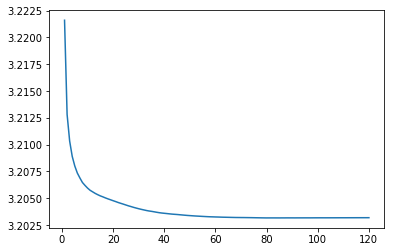

In [29]:
plt.plot(K,error2)

In [30]:
 error2.index(min(error2))

79

In [31]:
min(error2)

3.2031616909657723

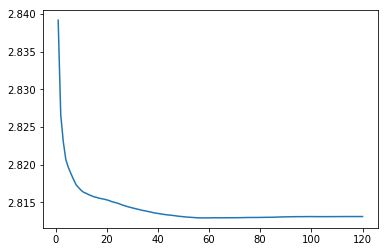

In [32]:
plt.plot(K,mae2)

older parts

In [33]:
mae2.index(min(mae2))

56

In [34]:
min(mae2)

2.8129467432497988

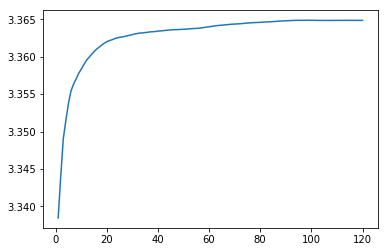

In [35]:
plt.plot(K,gim2)

In [36]:
gim2.index(min(gim2))

0

In [37]:
min(gim2)

3.3384655991553758

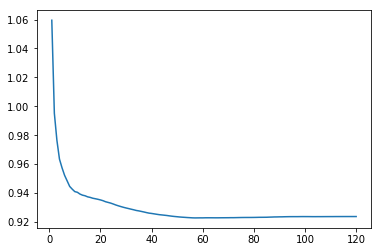

In [38]:
plt.plot(K,gpim2)

In [39]:
gpim2.index(min(gpim2))

56

In [40]:
min(gpim2)

0.9227897524173172

# older parts

In [13]:
index

15411

In [14]:
error2=[math.sqrt(i/index) for i in error]

In [15]:
mae2=[i/index for i in mae]

In [16]:
import matplotlib.pyplot as plt

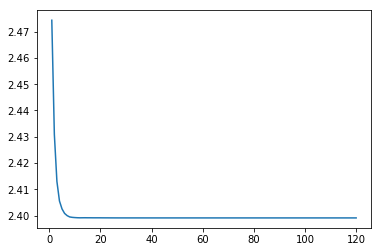

In [17]:
plt.plot(K,error2)

In [18]:
 error2.index(min(error2))

39

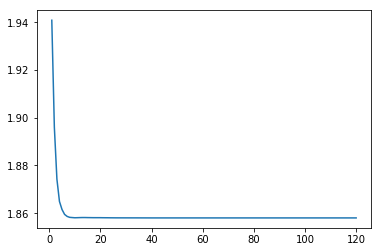

In [19]:
plt.plot(K,mae2)

In [20]:
mae2.index(min(mae2))

39

In [22]:
k_opt=39
t1=time.time()
error=0
mae=0
for index,i in test.iterrows():
    predicted=0
    usr=int(i['userId'])
    mov=int(i['itemId'])
    actual=i['rating']
        
    list_A=train[train['itemId']==mov]
    list_mov=train[train['userId']==usr]
    similarity=[]
    corres_rate=[]
    
    for ind2,u in list_A.iterrows():
        c1=[]
        c2=[]
        c_user=int(u['userId'])
        list_curuser=train[train['userId']==c_user]
        xt=pd.merge(list_mov,list_curuser,how='inner',on=['itemId'])
        c1=xt['rating_x']
        c2=xt['rating_y']
        c1_list=c1.tolist()
        c2_list=c2.tolist()
        sim=0
        if len(c1_list)!=0:
            sim=(1-spatial.distance.cosine(c1_list,c2_list))
        
        similarity.append(sim)
        corres_rate.append(u['rating'])
        
    corres_rate = [x for _,x in sorted(zip(similarity,corres_rate),reverse=True)]
    similarity.sort(reverse=True)
   
    #for k in K:
    cs=0
    numc=0
    for k in range(0,39):
        if k>=len(similarity):
            break
            
        cs+=similarity[k]
        numc+=(similarity[k]*corres_rate[k])
        #print(k,sm)
    
    if cs!=0:
        predicted=numc/cs
    
    error+=((actual-predicted)**2)
    mae+=(abs(actual-predicted))
        #count[k-1]+=1
    
t2=time.time()   

In [23]:
test.shape

(21232, 3)

In [24]:
math.sqrt(error/21232)

3.2035427868820165

In [25]:
mae/21232

2.8134518727764801